#        Indian Premier League Match Analysis

Indian Premier League has been one of the significant cricket league since 2008. There are multiple teams consisting of players from diverse countries which has gain a lot of popularity.This has also caught my eye and i have chosen this data set to analyze the performace of the team from Kaggle to help me learn more about analysis and visualization.

The initial step is to import the dataset available which is in CSV format with required tools and libraries necessary for exploratory data analysis and visualization.The tools I have used is pandas for data cleaning and processing,matplotlib pyplot package and seaborn for data visulaizations.

In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [422]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(10,5)

As Kaggle has provided two dataset in particular deliveries and matches. Here i have chosen matches for my first exploration of data.

In [423]:
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Statistical Summary of the Data

In [512]:
matches.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,636.0,318.500000,183.741666,1.0,159.75,318.5,477.25,636.0
season,636.0,2012.490566,2.773026,2008.0,2010.00,2012.0,2015.00,2017.0
dl_applied,636.0,0.025157,0.156726,0.0,0.00,0.0,0.00,1.0
win_by_runs,636.0,13.682390,23.908877,0.0,0.00,0.0,20.00,146.0
win_by_wickets,636.0,3.372642,3.420338,0.0,0.00,4.0,7.00,10.0
umpire3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Questions for the dataset

Looking at the dataset i have prepared some questions to be answered which would help to analyze the performance of the team and players.

1. How many teams are there in the dataset?
2. How many seasons do we have in our dataset?
3. Which team has won most of the tosses?
4. What is the commom toss decision among the teams?
5. How many games are played every season?
6. Which team have won most of the games played?
7. Which team has won the game with maximum runs?
8. Which team has won the game with maximum wickets?
9. Which team has won with minimum runs?
10. Which team has won the game with minimum wickets in hand?
11. Which player has won most of the  'player of match' award?
12. Which Stadium is chosen to be the best for the matches?
13. Which umpire has been chosen for most of the games?
14. Which team have won most of the toss and the matches?
15. How likely does the toss winning team wins the game?
16. How many games are won with the toss decisions throughout all the seasons?

In [424]:
matches.team1.unique()
matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace=True)
matches.team1.unique()

array(['SRH', 'MI', 'GL', 'RPS', 'RCB', 'KKR', 'DD', 'KXIP', 'CSK', 'RR',
       'DC', 'KTK', 'PW'], dtype=object)

Since the team name is too long I have extracted their initials which makes it more effective for illustrations.Although, I will use the names of the team when I explain the observations and draw my conclusions.

In [425]:
seasons = matches['season'].unique()
total_seasons = len(seasons)
total_seasons

10

###### We have 10 seasons recorded in our dataset.

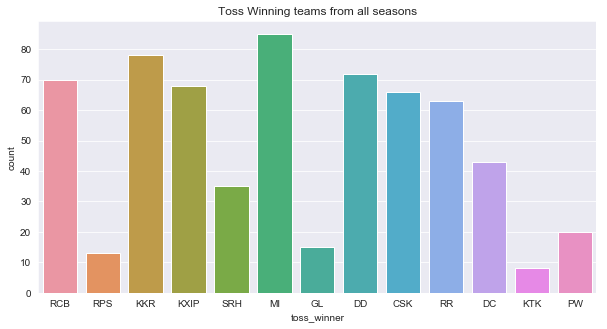

In [426]:
toss_winner = matches['toss_winner'].value_counts()
plt.title('Toss Winning teams from all seasons')
sns.countplot(x='toss_winner',data=matches)

###### From the above barchat, it is clear that Mumbai Indians(MI)have won maximum tosses followed by Kolkata Knight Riders(KKR) and Delhi Daredevils(DD).

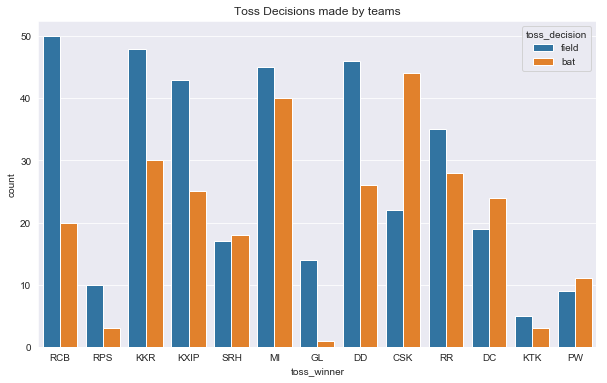

In [427]:
matches.groupby(['toss_winner','toss_decision']).toss_decision.count()
plt.subplots(figsize=(10,6))
plt.title('Toss Decisions made by teams')
sns.countplot(x='toss_winner',hue='toss_decision',data=matches)

###### From the above figure, it is evident that Royal Challengers bangalore choose to field when they win the toss rather than to bat first.However,the decision varies with Chennai Super Kings who choose to bat first.

Text(0, 0.5, 'Games')

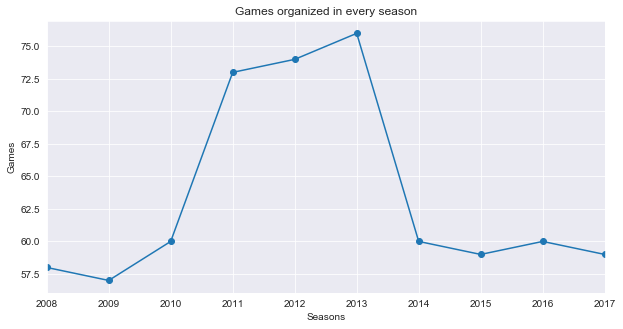

In [428]:
plt.title('Games organized in every season')
ax=matches.groupby('season').season.count().plot(marker='o')
plt.xlabel('Seasons')
plt.ylabel('Games')

###### The line chart depicts the information of the games played every seasons where the trend of playing more games started from 2011, reached the maximum at 2013 and has fallen again. This explains that the teams had a tough competition during these seasons.


In order to Calculate which team has won most of the games played, we concat two columns of the dataframe which represents the teams and count the value reseting the index.Since we have created a new dataframe we name the columns and add the wins count of the teams setting the index to the team names. 

In [429]:
total_matches = pd.concat([matches['team1'],matches['team2']])
total_matches = total_matches.value_counts().reset_index()
total_matches.columns=['Teams','Total Matches']
total_matches['Wins']=matches['winner'].value_counts().reset_index()['winner']
total_matches.set_index('Teams',inplace=True)
total_matches

,Total Matches,Wins
Teams,,
MI,157,92
RCB,152,79
KKR,148,77
KXIP,148,73
DD,147,70
CSK,131,63
RR,118,62
SRH,76,42
DC,75,29


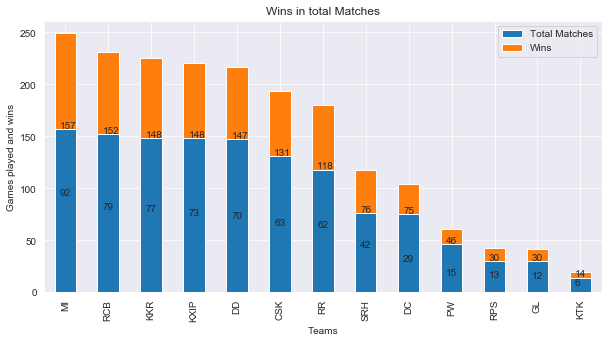

In [430]:
ax = total_matches.plot.bar(stacked=True)
plt.title('Wins in total Matches')
plt.xlabel('Teams')
plt.ylabel('Games played and wins')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.12, p.get_height()+1))

###### The stacked bar chart represents the the total matches and the wins played by all the teams through the IPL since 2008 to 2017.From above, we can conclude that Mumbai Indians(MI) have won most of the games compared to other teams with 92 wins out of 157 matches played.

In [432]:
winner_by_runs = matches.loc[[matches['win_by_runs'].idxmax()]]
winner_by_runs[['season','team1','team2','toss_winner','winner','win_by_runs','player_of_match']]

,season,team1,team2,toss_winner,winner,win_by_runs,player_of_match
43,2017,MI,DD,DD,MI,146,LMP Simmons


###### Therefore, the result shows that Mumbai Indians(MI)had won Delhi Daredevils(DD)by 146 runs in 2017 season. The player of the match was given to LMP Simmons.

In [433]:
winner_by_wickets = matches.loc[[matches['win_by_wickets'].idxmax()]]
winner_by_wickets[['season','team1','team2','toss_winner','winner','win_by_wickets','player_of_match']]

,season,team1,team2,toss_winner,winner,win_by_wickets,player_of_match
2,2017,GL,KKR,KKR,KKR,10,CA Lynn


##### Also in 2017 season, Kolkata Knight Riders(KKR) defeated Gujarat Lions(GL) by 10 wickets in hand and the player of the match was awarded to CA Lynn.

In [434]:
winner_by_min_runs = matches.loc[[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]]
winner_by_min_runs[['season','team1','team2','toss_winner','winner','win_by_runs','player_of_match']]

,season,team1,team2,toss_winner,winner,win_by_runs,player_of_match
58,2017,MI,RPS,MI,MI,1,KH Pandya


##### Mumbai Indians(MI) have defeated Rising Pune Supergiants(RPS) by 1 run in 2017 and the player of the match was declared to KH Pandya.

In [435]:
winner_by_min_wickets = matches.loc[[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]]
winner_by_min_wickets[['season','team1','team2','toss_winner','winner','win_by_wickets','player_of_match']]

,season,team1,team2,toss_winner,winner,win_by_wickets,player_of_match
559,2015,KXIP,KKR,KXIP,KKR,1,AD Russell


##### In season 2015, Kolkata Knight Riders won against Kings XI Punjab(KXIP) with a close range of a wicket in hand and the player of the match was awarded to AD Russell.

Text(0, 0.5, 'Player of the Match')

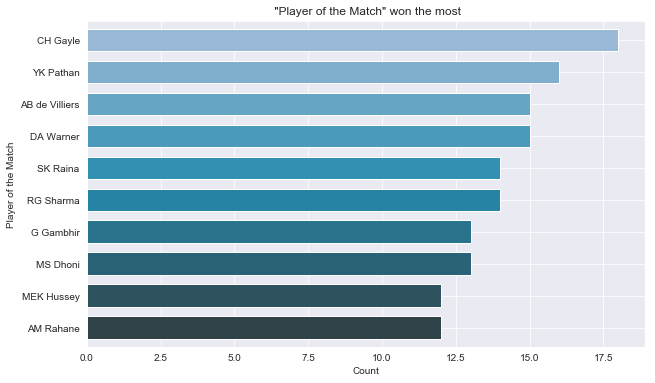

In [436]:
plt.subplots(figsize=(10,6))
plt.title(' "Player of the Match" won the most')
top_players = matches.player_of_match.value_counts().head(10).sort_values()
top_players.plot.barh(width=0.7,color= sns.color_palette('PuBuGn_d',10))
plt.xlabel('Count')
plt.ylabel('Player of the Match')

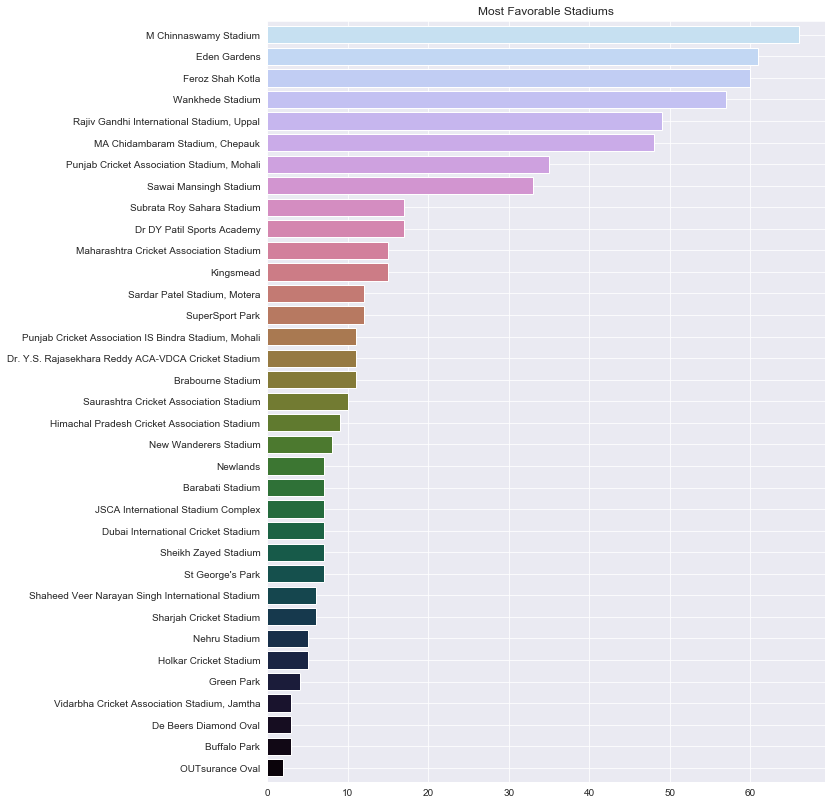

In [437]:
most_games_played_stadium= matches.venue.value_counts()
most_games_played_stadium
plt.subplots(figsize=(10,14))
plt.title('Most Favorable Stadiums')
most_games_played_stadium.sort_values().plot.barh(width=0.8,color= sns.color_palette('cubehelix',40))

###### The above figure clearly depicts that M Chinnaswamy Stadium is more preferred for IPL matches.

In [513]:
#Umpire 3 has all NAN values which is neglected in this case.
best_umpires = pd.concat([matches['umpire1'],matches['umpire2']])
best_umpires = best_umpires.value_counts().reset_index()
best_umpires.columns = ['Umpires','Games_Incharge']
best_umpires.set_index('Umpires',inplace=True)
best_umpires.head()

,Games_Incharge
Umpires,
HDPK Dharmasena,87
S Ravi,85
AK Chaudhary,58
C Shamshuddin,56
SJA Taufel,55


Text(0, 0.5, 'Umpires')

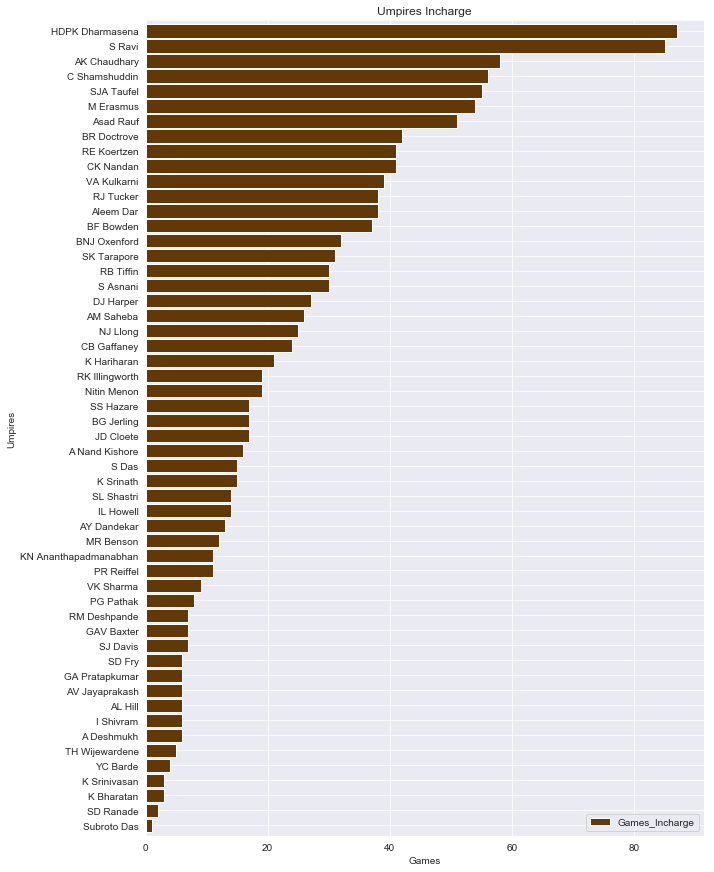

In [439]:
best_umpires.sort_values(by='Games_Incharge').plot.barh(figsize=(10,15),width=0.9,color=sns.color_palette('BrBG',40))
plt.title('Umpires Incharge')
plt.xlabel('Games')
plt.ylabel('Umpires')

##### With the above chart it is clear that HPDK Dhamasena has been incharge for most of the IPL matches since 2008 to 2017.

Text(0, 0.5, 'Wins')

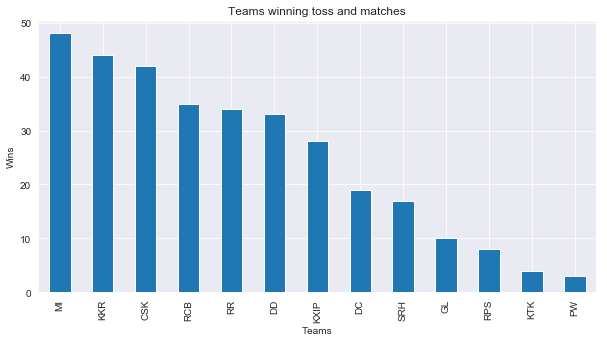

In [463]:
toss_match_winners = matches[matches['toss_winner']==matches['winner']]
toss_match_winners.groupby('toss_winner').winner.count().sort_values(ascending=False).plot.bar()
plt.title('Teams winning toss and matches')
plt.xlabel('Teams')
plt.ylabel('Wins')

###### It is clear that Mumbai Indian(MI) are winning most of the games when they win the toss.

Text(0, 0.5, 'Count')

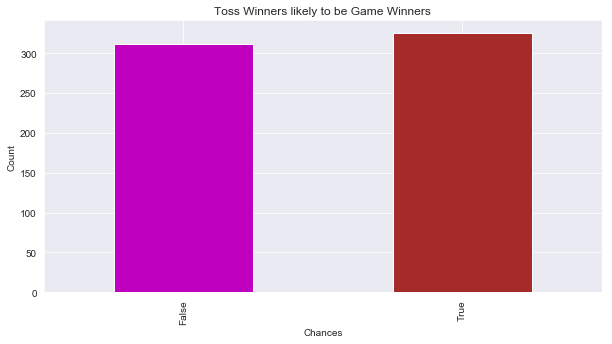

In [482]:
toss_game_winning_chances = matches['toss_winner']==matches['winner']
data = toss_game_winning_chances.groupby(toss_game_winning_chances).size()
data.plot.bar(color=['m','Brown'])
plt.title('Toss Winners likely to be Game Winners')
plt.xlabel('Chances')
plt.ylabel('Count')

###### Although the values are close, the toss winning team has a slight higher rate than the team losing after winning the toss.

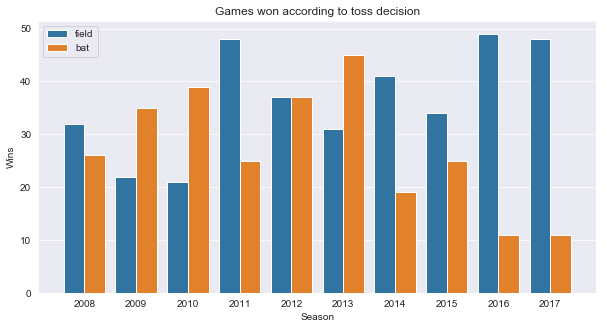

In [510]:
season_toss = matches.groupby(['season','toss_decision']).winner.size()
sns.countplot(x='season',hue='toss_decision',data=matches).plot(marker='o')
plt.title('Games won according to toss decision')
plt.xlabel('Season')
plt.ylabel('Wins')
plt.legend()

###### We can see that in most of the seasons chasing the target score have won the game except in 2013 which is entirely opposite and 2012 which happens to be in equilibrium.